In [1]:
import torch
import numpy as np

# ============================================================================
# Generate Data and Mask
# ============================================================================

# Generate random data
data = torch.randint(-10, 10, (10, 10))
print("Original Data:")
print(data)
print(f"Shape: {data.shape}\n")

# ============================================================================
# Method 1: Create a boolean mask (same shape as data)
# ============================================================================
print("=" * 70)
print("Method 1: Boolean Mask")
print("=" * 70)

# Create a mask where values > 0 are True, others are False
mask = data > 0
print("Mask (where data > 0):")
print(mask)
print(f"Mask shape: {mask.shape}")
print(f"Mask dtype: {mask.dtype}\n")

# Apply mask: fill positions where mask is True with a value
data_masked = data.masked_fill(mask, -999)
print("After masked_fill(mask, -999):")
print("(Values > 0 replaced with -999)")
print(data_masked)
print()

# ============================================================================
# Method 2: Create a mask for specific conditions
# ============================================================================
print("=" * 70)
print("Method 2: Conditional Mask (values < 0)")
print("=" * 70)

mask_negative = data < 0
print("Mask (where data < 0):")
print(mask_negative)

data_masked_neg = data.masked_fill(mask_negative, 0)
print("\nAfter masked_fill(mask_negative, 0):")
print("(Negative values replaced with 0)")
print(data_masked_neg)
print()

# ============================================================================
# Method 3: Create a mask using torch operations
# ============================================================================
print("=" * 70)
print("Method 3: Complex Mask (values between -5 and 5)")
print("=" * 70)

mask_range = (data >= -5) & (data <= 5)
print("Mask (where -5 <= data <= 5):")
print(mask_range)

data_masked_range = data.masked_fill(mask_range, 100)
print("\nAfter masked_fill(mask_range, 100):")
print("(Values in range [-5, 5] replaced with 100)")
print(data_masked_range)
print()

# ============================================================================
# Method 4: Create a custom pattern mask
# ============================================================================
print("=" * 70)
print("Method 4: Pattern Mask (diagonal)")
print("=" * 70)

# Create a diagonal mask
diagonal_mask = torch.eye(10, dtype=torch.bool)
print("Diagonal mask:")
print(diagonal_mask)

data_masked_diag = data.masked_fill(diagonal_mask, 999)
print("\nAfter masked_fill(diagonal_mask, 999):")
print("(Diagonal elements replaced with 999)")
print(data_masked_diag)
print()

# ============================================================================
# Method 5: Causal mask (lower triangular) - like in GPT
# ============================================================================
print("=" * 70)
print("Method 5: Causal Mask (Lower Triangular)")
print("=" * 70)

# Create lower triangular mask (causal mask)
causal_mask = torch.tril(torch.ones(10, 10, dtype=torch.bool))
print("Causal mask (lower triangular):")
print(causal_mask)

# Fill upper triangle (future positions) with -inf
data_causal = data.float().masked_fill(~causal_mask, float("-inf"))
print("\nAfter masked_fill(~causal_mask, -inf):")
print("(Upper triangle filled with -inf for causal attention)")
print(data_causal)
print()

# ============================================================================
# Summary: masked_fill syntax
# ============================================================================
print("=" * 70)
print("Summary: masked_fill() Syntax")
print("=" * 70)
print("""
Syntax: tensor.masked_fill(mask, value)

Parameters:
- mask: Boolean tensor (same shape or broadcastable)
  - True positions will be filled with 'value'
  - False positions remain unchanged
- value: The value to fill masked positions

Key Points:
1. Mask must be boolean (dtype=torch.bool)
2. Mask shape must match or be broadcastable to data shape
3. masked_fill() modifies in-place by default (returns new tensor)
4. Common use cases:
   - Causal masking in transformers
   - Replacing invalid values
   - Creating attention masks
   - Zeroing out specific regions

Examples:
- data.masked_fill(mask, 0)      # Fill with 0
- data.masked_fill(mask, -inf)   # Fill with negative infinity
- data.masked_fill(mask, 999)    # Fill with 999
""")

Original Data:
tensor([[  2,   4,   3, -10,  -5,  -1,  -8,  -9,   8, -10],
        [ -6,  -1,  -3, -10,   1,   6,  -6,   1,   4,   9],
        [  6,  -5,  -6, -10,  -1,  -8,  -9, -10,   0,   9],
        [  6,   0,  -8,   2,   1,  -2,  -7,   9,  -5,   8],
        [ -5,   7,   8,   1,   3,   9,  -3,  -8,  -8,  -6],
        [  4,   9,   3,  -7,  -5, -10,   5,   5,   9,   8],
        [  7,   0,  -5,   8, -10,   6,  -5,   9,  -5,  -6],
        [ -3,  -2,  -2,   2,   6,  -3,  -2,  -7,  -5,   9],
        [  1,   8,   1,   8,  -2,  -2,  -7,   7,   6,  -1],
        [  3,   5,   3,  -2,   2,  -2,  -4,   9,   5,  -5]])
Shape: torch.Size([10, 10])

Method 1: Boolean Mask
Mask (where data > 0):
tensor([[ True,  True,  True, False, False, False, False, False,  True, False],
        [False, False, False, False,  True,  True, False,  True,  True,  True],
        [ True, False, False, False, False, False, False, False, False,  True],
        [ True, False, False,  True,  True, False, False,  True, Fals

Original Data:
tensor([[6, 0, 3, 7, 9],
        [0, 3, 3, 5, 2],
        [6, 3, 2, 2, 9],
        [0, 6, 8, 8, 1],
        [4, 4, 0, 7, 6]])

Mask (values > 5):
tensor([[1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1]], dtype=torch.int32)

After masked_fill(mask, -1):
tensor([[-1,  0,  3, -1, -1],
        [ 0,  3,  3,  5,  2],
        [-1,  3,  2,  2, -1],
        [ 0, -1, -1, -1,  1],
        [ 4,  4,  0, -1, -1]])


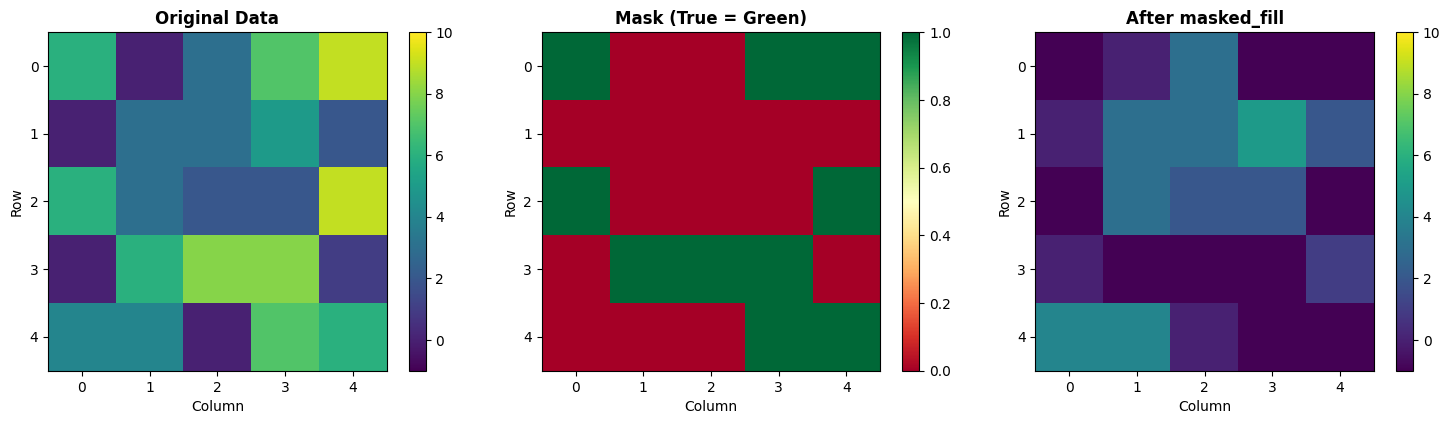

In [2]:
# ============================================================================
# Visual Example: Before and After Masking
# ============================================================================

import matplotlib.pyplot as plt

# Create a simple example
data_simple = torch.randint(0, 10, (5, 5))
mask_simple = data_simple > 5
data_filled = data_simple.masked_fill(mask_simple, -1)

print("Original Data:")
print(data_simple)
print("\nMask (values > 5):")
print(mask_simple.int())  # Convert to int for better visualization
print("\nAfter masked_fill(mask, -1):")
print(data_filled)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original data
im1 = axes[0].imshow(data_simple.numpy(), cmap='viridis', vmin=-1, vmax=10)
axes[0].set_title('Original Data', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Column')
axes[0].set_ylabel('Row')
plt.colorbar(im1, ax=axes[0])

# Mask
im2 = axes[1].imshow(mask_simple.int().numpy(), cmap='RdYlGn', vmin=0, vmax=1)
axes[1].set_title('Mask (True = Green)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Column')
axes[1].set_ylabel('Row')
plt.colorbar(im2, ax=axes[1])

# Masked data
im3 = axes[2].imshow(data_filled.numpy(), cmap='viridis', vmin=-1, vmax=10)
axes[2].set_title('After masked_fill', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Column')
axes[2].set_ylabel('Row')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# Practical Example: Attention Mask (like in GPT)
# ============================================================================

print("=" * 70)
print("Practical Example: Causal Attention Mask")
print("=" * 70)

# Simulate attention scores
seq_len = 5
attention_scores = torch.randn(seq_len, seq_len) * 2
print("Attention Scores (before masking):")
print(attention_scores)
print()

# Create causal mask (lower triangular)
causal_mask = torch.tril(torch.ones(seq_len, seq_len, dtype=torch.bool))
print("Causal Mask (lower triangular):")
print(causal_mask.int())
print()

# Apply mask: fill upper triangle with -inf
masked_scores = attention_scores.masked_fill(~causal_mask, float("-inf"))
print("Masked Attention Scores (upper triangle = -inf):")
print(masked_scores)
print()

# Apply softmax (positions with -inf become 0)
attention_weights = torch.softmax(masked_scores, dim=-1)
print("Attention Weights (after softmax):")
print(attention_weights)
print("(Each row sums to 1, future positions are 0)")
print(f"Row sums: {attention_weights.sum(dim=-1)}")